# Toplevel Notebook for Stability Tuning

### Preparation

In [54]:
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib import colors
import numpy as np
import seaborn as sns
import stabtune_utils as stabtune_utils
import stabtune_plotter as stabtune_plotter
import os
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Action Required: Define the input (tuning dataframe) location

In [56]:
input_dir = '../../' # input directory for tuning dataframe
output_dir = 'C:\\Files\\UM\\ND\\github\\big_nhp_dataset_code\\outputs'
selected_channels = [0,1,2,3] # selected channels for displaying in polar plot

In [3]:
# load data
tuning_df = stabtune_utils.load_tuning_data(input_dir, overwrite=False)
tuning_df['date'] = pd.to_datetime(tuning_df['date'])
# testing function: ../../../../SFN/preprocessing_092024_no7822nofalcon

In [4]:
# testing: figuring out what is max and min of magnitude to bound the plot, delete later
max_magnitude = tuning_df['magnitude'].quantile(0.99)
min_magnitude = tuning_df['magnitude'].quantile(0.01)
# max_magnitude = tuning_df['magnitude'].max()
# min_magnitude = tuning_df['magnitude'].min()
print(f"0.99 Quantile (Max Magnitude): {max_magnitude}")
print(f"0.01 Quantile (Min Magnitude): {min_magnitude}")

0.99 Quantile (Max Magnitude): 0.05302147033920138
0.01 Quantile (Min Magnitude): 0.000828924594908148


## WIP Plots, will be moved to a general plotter after review and modification

### Code to generate the big plot (WIP no toplevel plotter yet)

In [ ]:
from matplotlib.gridspec import GridSpec, GridSpecFromSubplotSpec
import matplotlib.cm as cm
import matplotlib.colors as colors
fig = plt.figure(figsize=(25, 18))  # Adjusted figure size for the additional row
gs = GridSpec(4, len(selected_channels), figure=fig, height_ratios=[1, 0.1, 1, 1])  # Added another row

ax_row1 = [fig.add_subplot(gs[0, i]) for i in range(len(selected_channels))]
ax_row2 = GridSpecFromSubplotSpec(1, 2, subplot_spec=gs[2,:], width_ratios=[20, 1],wspace=0.05)
ax_row3 = GridSpecFromSubplotSpec(1, 2, subplot_spec=gs[3,:], width_ratios=[20, 1],wspace=0.05)
ax_row2_left = fig.add_subplot(ax_row2[0])
ax_row3_left = fig.add_subplot(ax_row3[0])
ax_row2_left.margins(0)
ax_row3_left.margins(0)
# Plot polar plots for each selected channel
cmap = 'crest'
for i, channel in enumerate(selected_channels):
    if ax_row1[i] is not None:  # Ensure the axes object is valid
        im = stabtune_plotter.plot_polar_tuning(ax_row1[i], tuning_df, channel, ylim=(min_magnitude, max_magnitude), cmap=cmap)

ax_cbar = GridSpecFromSubplotSpec(1, 2, subplot_spec=gs[1,:], width_ratios=[20, 1])
cbar_ax = fig.add_subplot(ax_cbar[0])
all_dates = pd.date_range(tuning_df['date'].min(), tuning_df['date'].max())
norm = colors.Normalize(vmin=0, vmax=len(all_dates) - 1)
sm = cm.ScalarMappable(cmap=sns.color_palette(cmap, as_cmap=True).reversed(), norm=norm)
sm.set_array([])
cbar = fig.colorbar(sm, cax=cbar_ax, orientation='horizontal')
xticks = [i for i, date in enumerate(all_dates) if date.month in [3, 9] and date.day == 1]
cbar.set_ticks(xticks)
cbar.set_ticklabels([all_dates[i].strftime('%Y-%m-%d') for i in xticks])

def desaturate_hsv(colormap = 'hsv', s = 0.75):
    # 1 ) grab the built‑in cyclic map (256 samples give a smooth gradient)
    base = plt.cm.get_cmap(colormap, 256)

    # 2 ) split RGB and α
    rgba = base(np.linspace(0, 1, 256))
    rgb  = rgba[:, :3]                 # (N,3)
    alpha = rgba[:, 3]                 # keep original transparency

    # 3 ) RGB → HSV, desaturate, HSV → RGB
    hsv  = colors.rgb_to_hsv(rgb)
    hsv[:, 1] *= s                 # ← 0 = grey‑scale … 1 = original saturation
    desat_rgb = colors.hsv_to_rgb(hsv)

    # 4 ) re‑attach α and build the new map
    desat_rgba = np.column_stack([desat_rgb, alpha])
    cmap_hsv_desat = colors.ListedColormap(desat_rgba, name='hsv_desat')
    cmap_hsv_desat.set_bad('grey')    # NaNs will plot in black
    return cmap_hsv_desat
# Plot heatmaps for the second and third rows
stabtune_plotter.plot_heat_map_uniform_Experimental(ax_row2_left, tuning_df, choice='original', type='magnitude', cmap='viridis', plot_xlabel = False, is_circle_cbar = True)

# Set the colorbar for the heatmap
all_dates = pd.date_range(tuning_df['date'].min(), tuning_df['date'].max())
matrix    = (tuning_df.pivot(index='channel', columns='date', values='magnitude').reindex(columns=all_dates))
lower, upper = np.nanquantile(matrix.values, [0.01, 0.99])
cbar_ax = fig.add_subplot(ax_row2[1])
norm = colors.Normalize(vmin=lower, vmax=upper)
sm = cm.ScalarMappable(cmap='viridis', norm=norm)
sm.set_array([])
cbar = fig.colorbar(sm, cax=cbar_ax, orientation='vertical')


stabtune_plotter.plot_heat_map_uniform_Experimental(ax_row3_left, tuning_df, choice='original', type='angle', cmap=desaturate_hsv(), is_circle_cbar = True)

stabtune_plotter.draw_angle_wheel(fig.add_subplot(ax_row3[1]), desaturate_hsv())

fig.savefig(os.path.join(output_dir, 'tuning_analysis.pdf'))
plt.show()



C:\Users\chang\AppData\Local\Temp\ipykernel_30512\1340462735.py:33: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  base = plt.cm.get_cmap(colormap, 256)
C:\Users\chang\AppData\Local\Temp\ipykernel_30512\1340462735.py:33: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  base = plt.cm.get_cmap(colormap, 256)


C:\Users\chang\AppData\Local\Temp\ipykernel_30512\3791923707.py:23: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  base = plt.cm.get_cmap(colormap, 256)


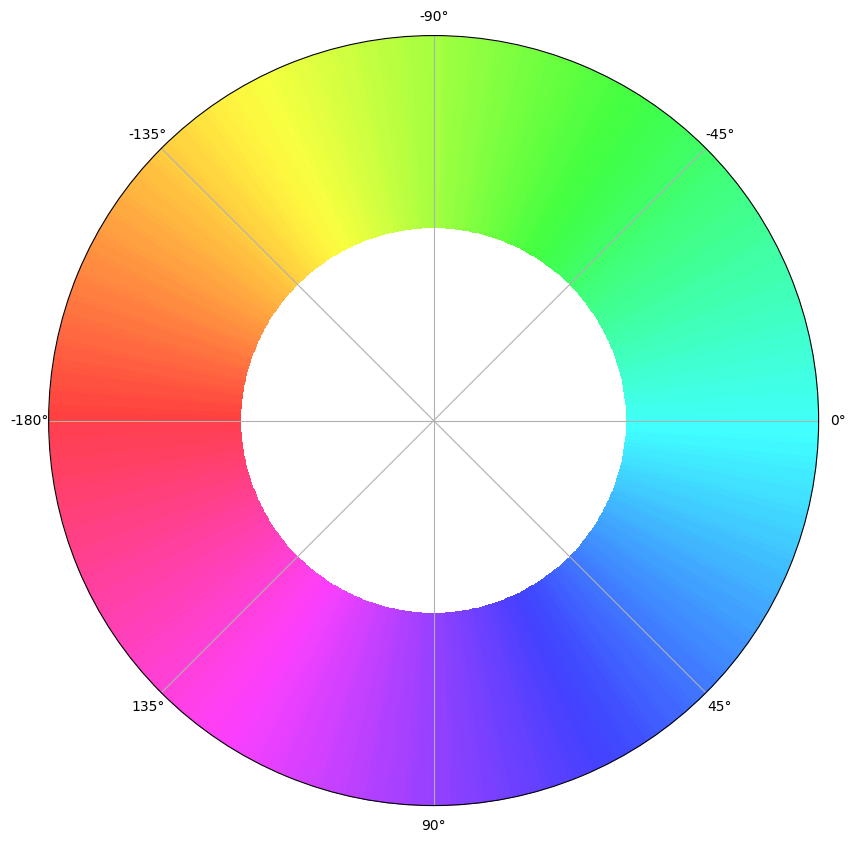

In [58]:
fig, ax = plt.subplots(figsize=(25, 10))
stabtune_plotter.draw_angle_wheel(ax, desaturate_hsv())
fig.savefig(os.path.join(output_dir, 'tuning_analysis_cwheel.pdf'))

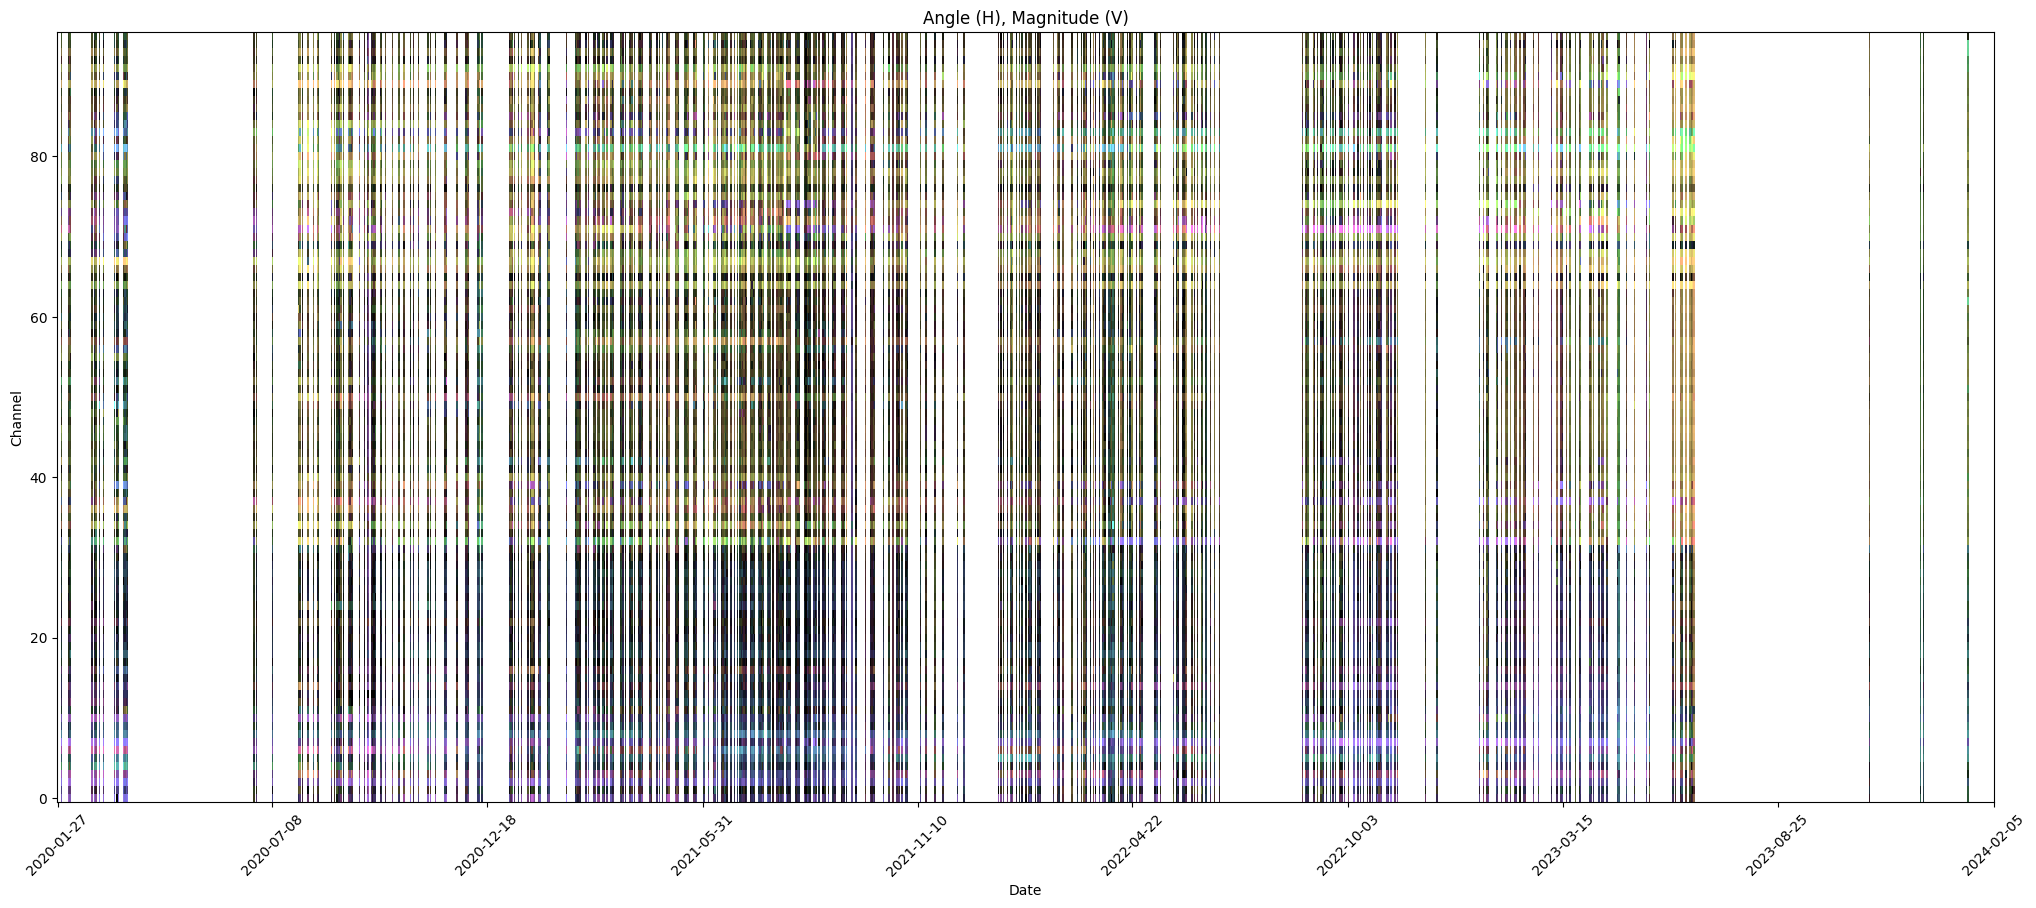

In [8]:
fig, ax = plt.subplots(figsize=(25, 10))

stabtune_plotter.plot_heat_map_HSV(ax, tuning_df,sat=0.5)

### Time graphs (seperated by 32)

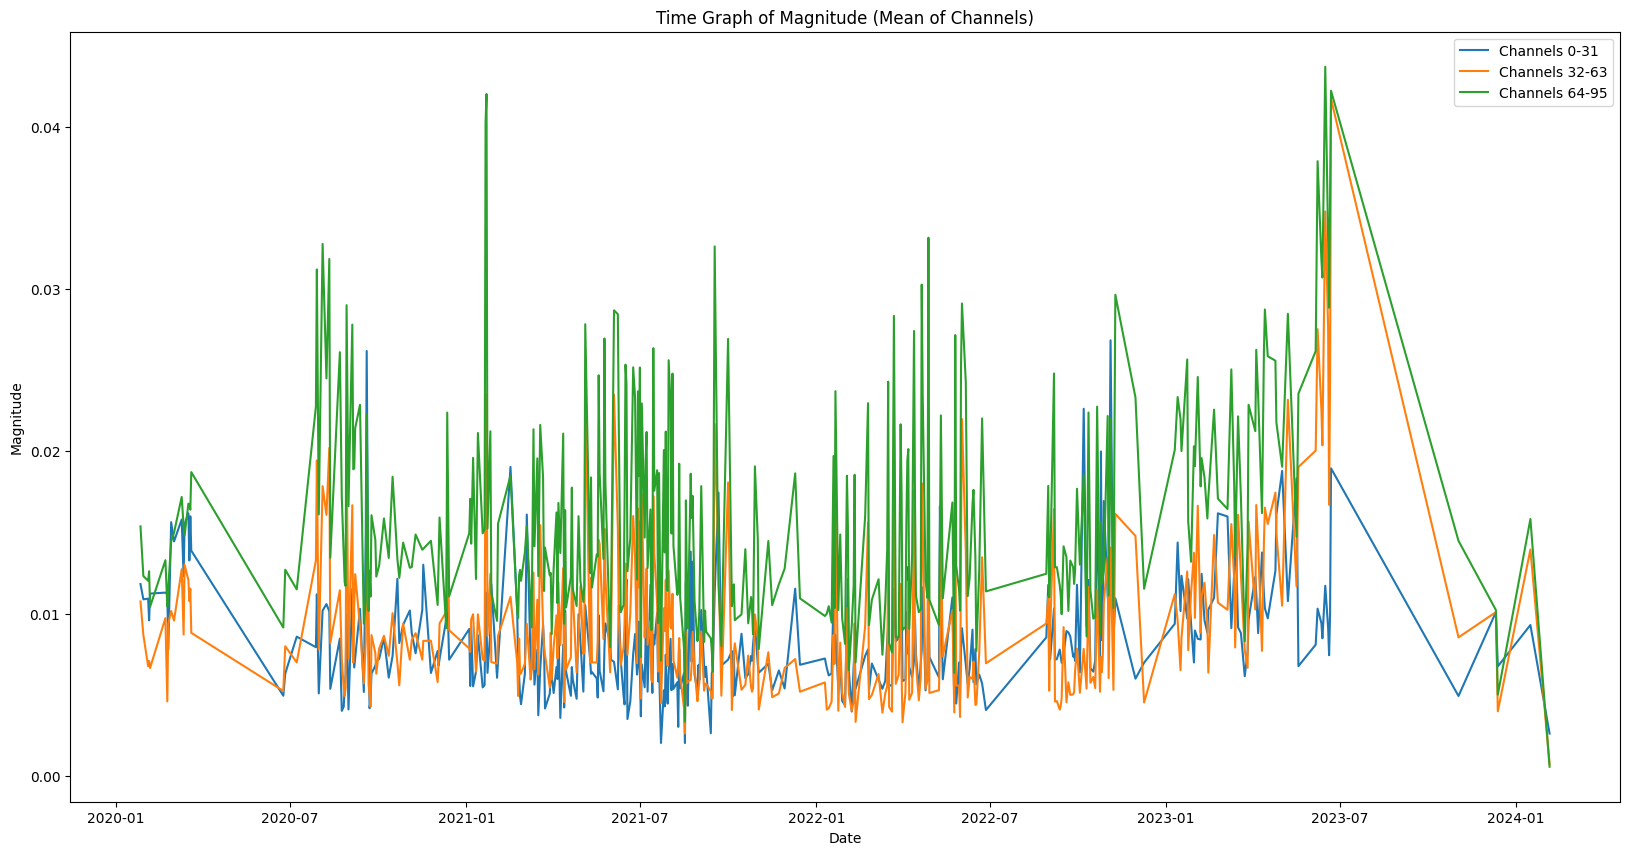

In [9]:
fig, ax = plt.subplots(figsize=(20, 10))
stabtune_plotter.plot_time_graph(ax, tuning_df, choice='original', type='magnitude', channels=list(range(0, 32)))
stabtune_plotter.plot_time_graph(ax, tuning_df, choice='original', type='magnitude', channels=list(range(32, 64)))
stabtune_plotter.plot_time_graph(ax, tuning_df, choice='original', type='magnitude', channels=list(range(64, 96)))

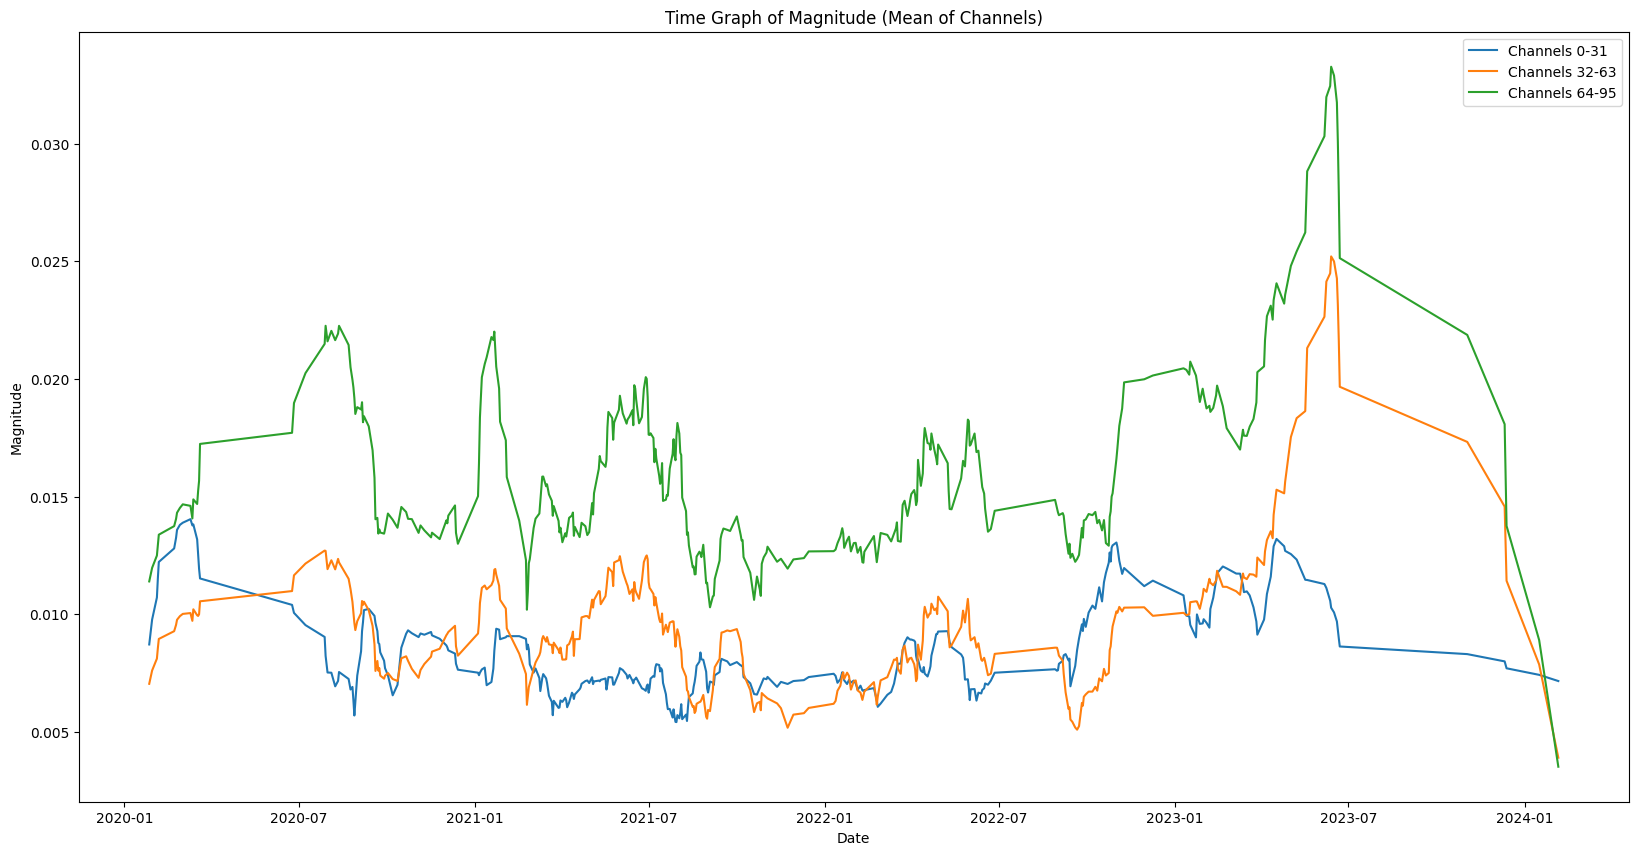

In [10]:
fig, ax = plt.subplots(figsize=(20, 10))
smoothing_params = {'window_length': 20, 'polyorder': 2}
stabtune_plotter.plot_time_graph(ax, tuning_df, choice='original', type='magnitude', channels=list(range(0, 32)), apply_smoothing=True, smoothing_params=smoothing_params)
stabtune_plotter.plot_time_graph(ax, tuning_df, choice='original', type='magnitude', channels=list(range(32, 64)), apply_smoothing=True, smoothing_params=smoothing_params)
stabtune_plotter.plot_time_graph(ax, tuning_df, choice='original', type='magnitude', channels=list(range(64, 96)), apply_smoothing=True, smoothing_params=smoothing_params)


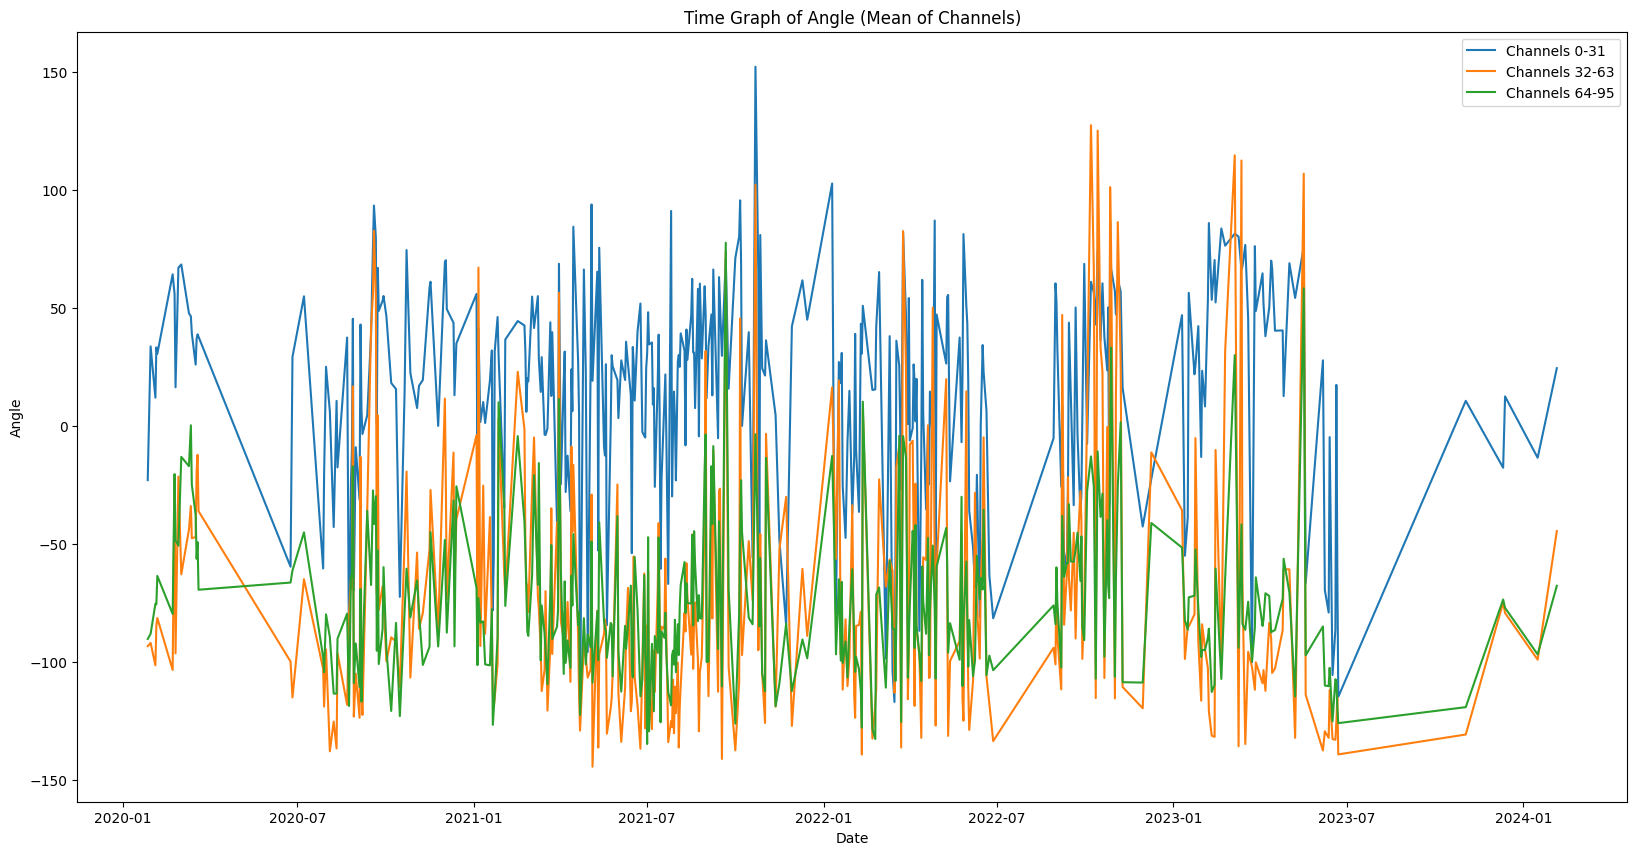

In [11]:
fig, ax = plt.subplots(figsize=(20, 10))
stabtune_plotter.plot_time_graph(ax, tuning_df, choice='original', type='angle', channels=list(range(0, 32)))
stabtune_plotter.plot_time_graph(ax, tuning_df, choice='original', type='angle', channels=list(range(32, 64)))
stabtune_plotter.plot_time_graph(ax, tuning_df, choice='original', type='angle', channels=list(range(64, 96)))

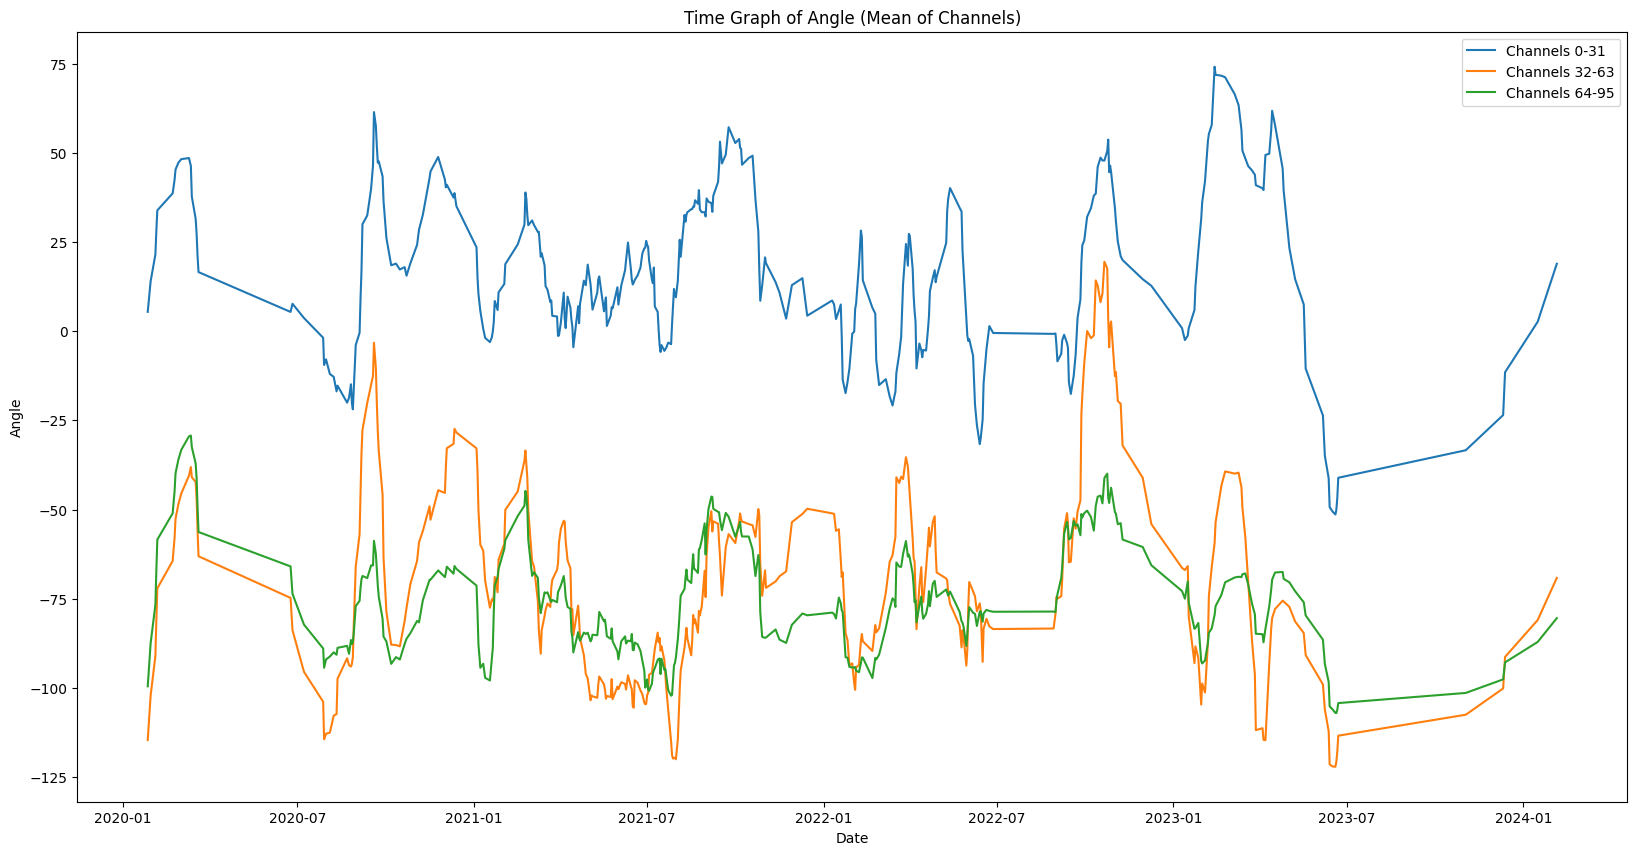

In [12]:
fig, ax = plt.subplots(figsize=(20, 10))
smoothing_params = {'window_length': 20, 'polyorder': 2}
stabtune_plotter.plot_time_graph(ax, tuning_df, choice='original', type='angle', channels=list(range(0, 32)), apply_smoothing=True, smoothing_params=smoothing_params)
stabtune_plotter.plot_time_graph(ax, tuning_df, choice='original', type='angle', channels=list(range(32, 64)), apply_smoothing=True, smoothing_params=smoothing_params)
stabtune_plotter.plot_time_graph(ax, tuning_df, choice='original', type='angle', channels=list(range(64, 96)), apply_smoothing=True, smoothing_params=smoothing_params)

### Nicholas' Stuff

c:\Files\UM\ND\github\big_nhp_dataset_code\analysis\singlechanneltuning\stabtune_plotter.py:304: FutureWarning: The behavior of obj[i:j] with a float-dtype index is deprecated. In a future version, this will be treated as positional instead of label-based. For label-based slicing, use obj.loc[i:j] instead
  angles = df_tuning['angle'].loc[time_point][:50].values  # First 5 channels
c:\Files\UM\ND\github\big_nhp_dataset_code\analysis\singlechanneltuning\stabtune_plotter.py:305: FutureWarning: The behavior of obj[i:j] with a float-dtype index is deprecated. In a future version, this will be treated as positional instead of label-based. For label-based slicing, use obj.loc[i:j] instead
  magnitudes = df_tuning['magnitude'].loc[time_point][:50].values


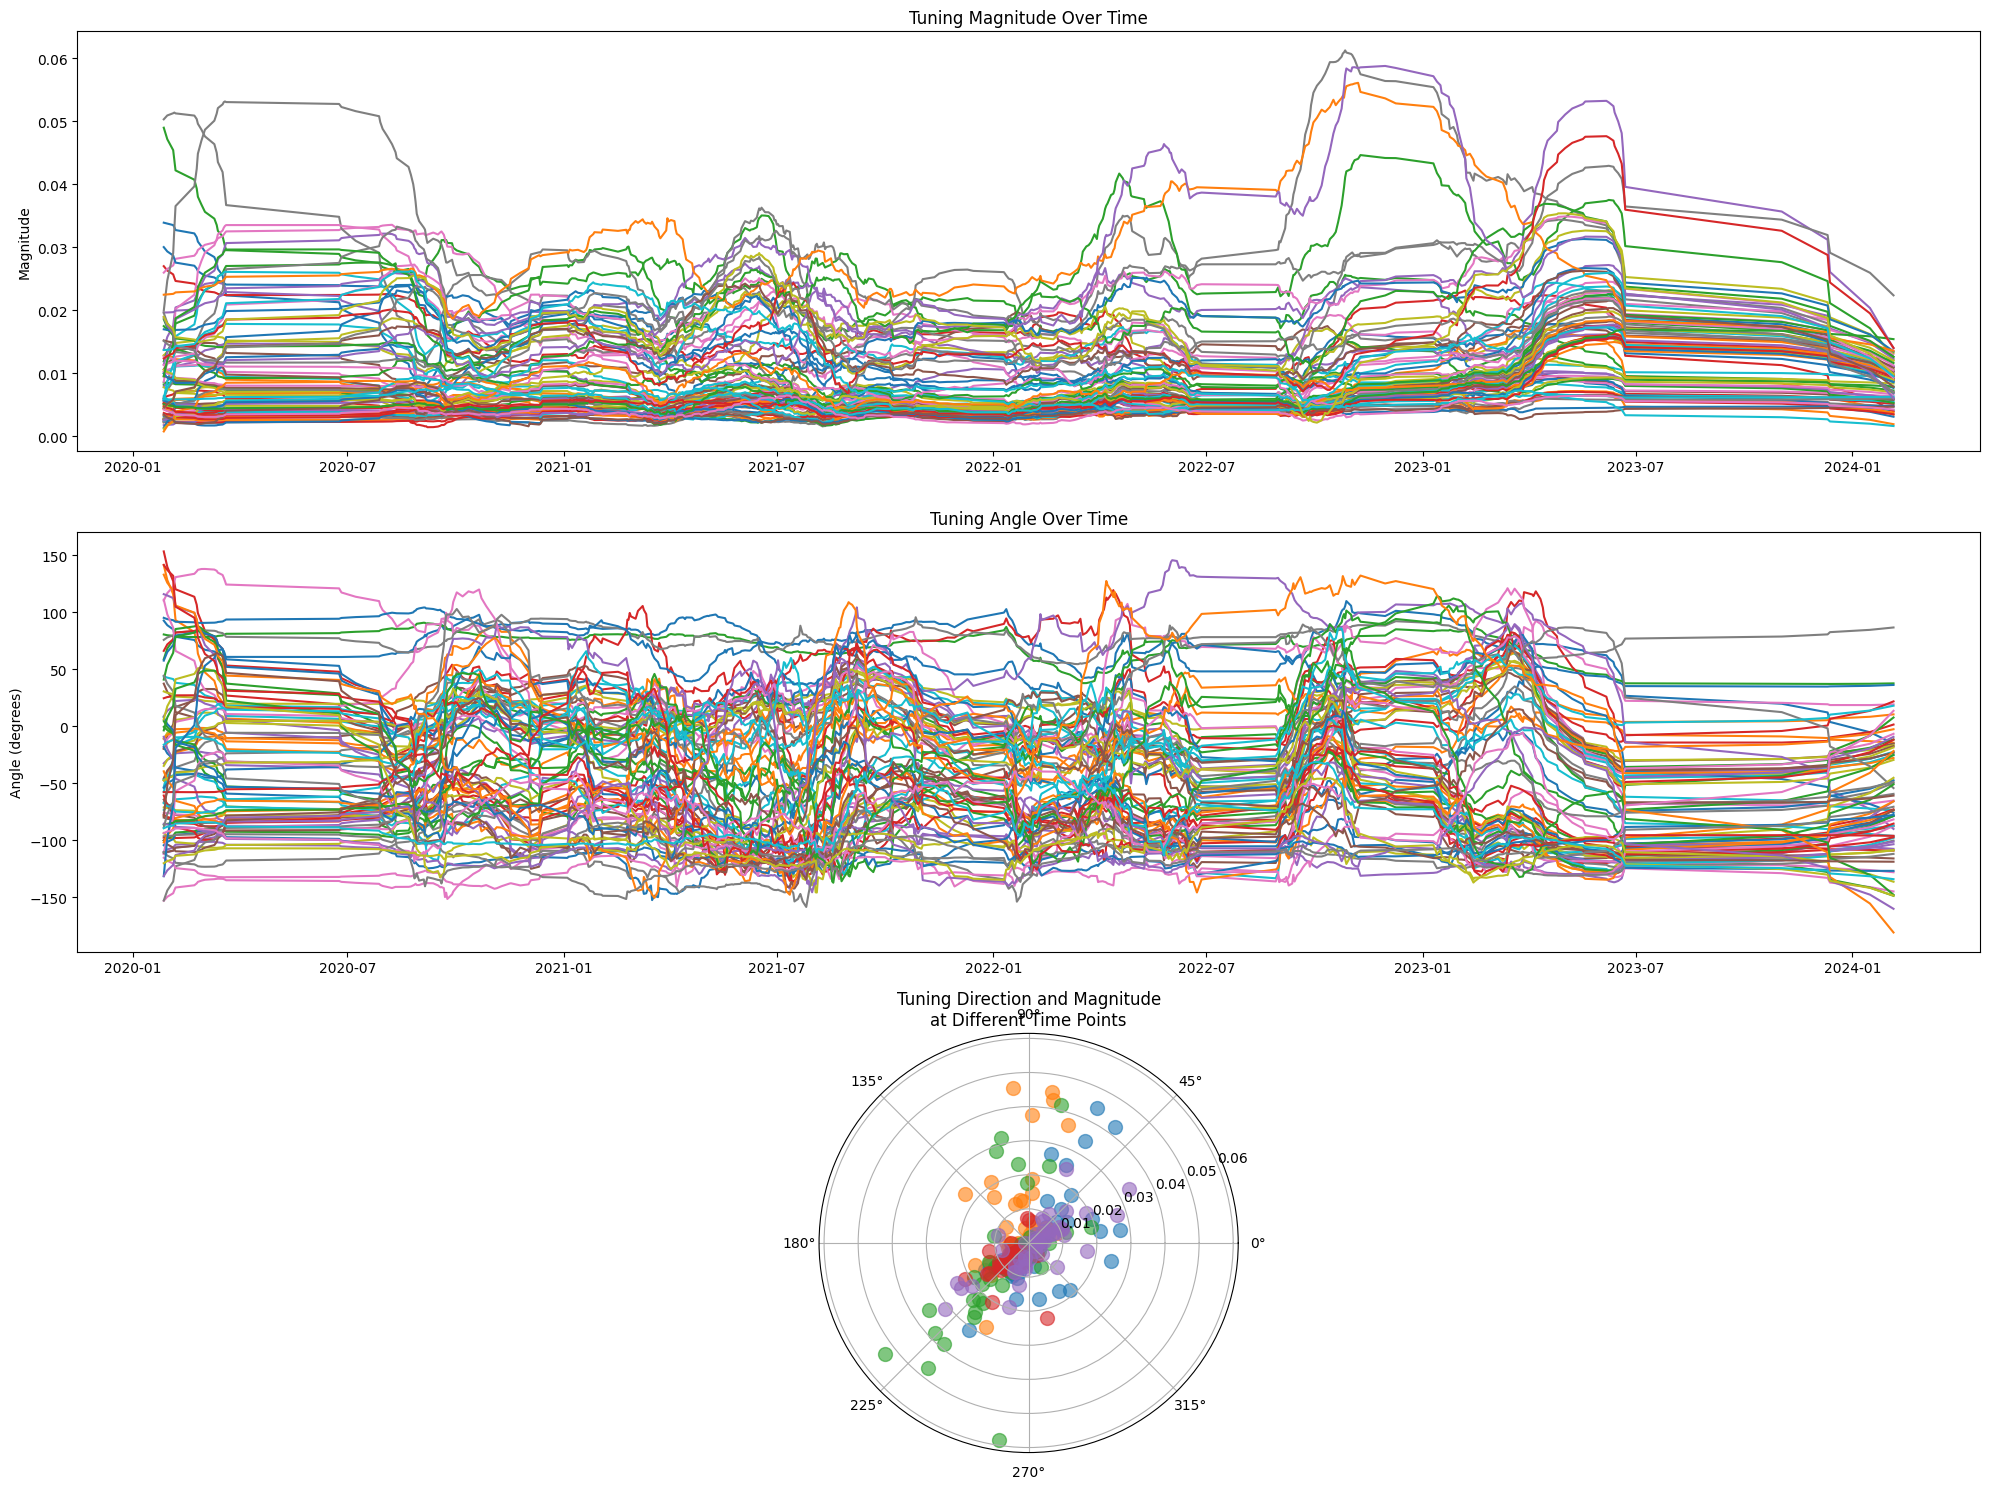

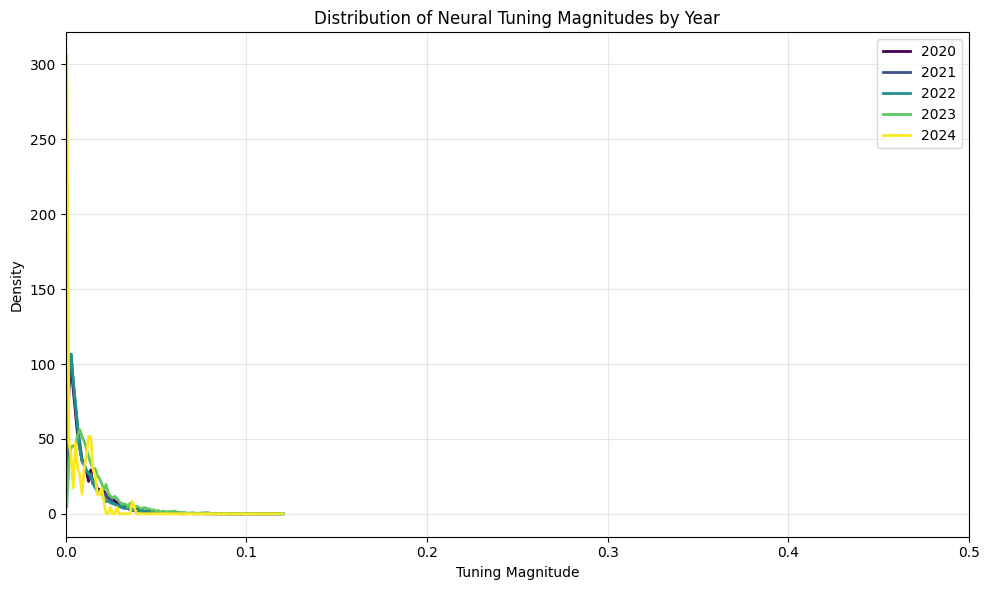


## Yearly Means ##
Year 2020: 0.0116
Year 2021: 0.0104
Year 2022: 0.0103
Year 2023: 0.0158
Year 2024: 0.0072

## Distribution Comparisons Between Years ##
Years        JS Div     KS Stat    KS p-val   t-stat     t p-val    Mean Diff 
------------------------------------------------------------------------
2020-2021    0.0451    0.0459    1.28e-08  7.1792    7.47e-13  -0.0012
2020-2022    0.0571    0.0591    1.20e-12  7.2855    3.39e-13  -0.0013
2020-2023    0.1693    0.2235    3.40e-122  -17.3114    3.91e-66  0.0042
2020-2024    0.2221    0.3463    1.84e-20  7.8580    1.77e-13  -0.0045
2021-2022    0.0337    0.0206    1.01e-02  0.7630    4.45e-01  -0.0001
2021-2023    0.1952    0.2533    3.30e-208  -25.4614    1.17e-136  0.0053
2021-2024    0.1999    0.3460    8.08e-21  5.8914    1.60e-08  -0.0033
2022-2023    0.2041    0.2726    2.66e-221  -24.8588    2.29e-131  0.0055
2022-2024    0.1904    0.3403    4.89e-20  5.6727    4.75e-08  -0.0032
2023-2024    0.3249    0.4001    3.65e-27  14

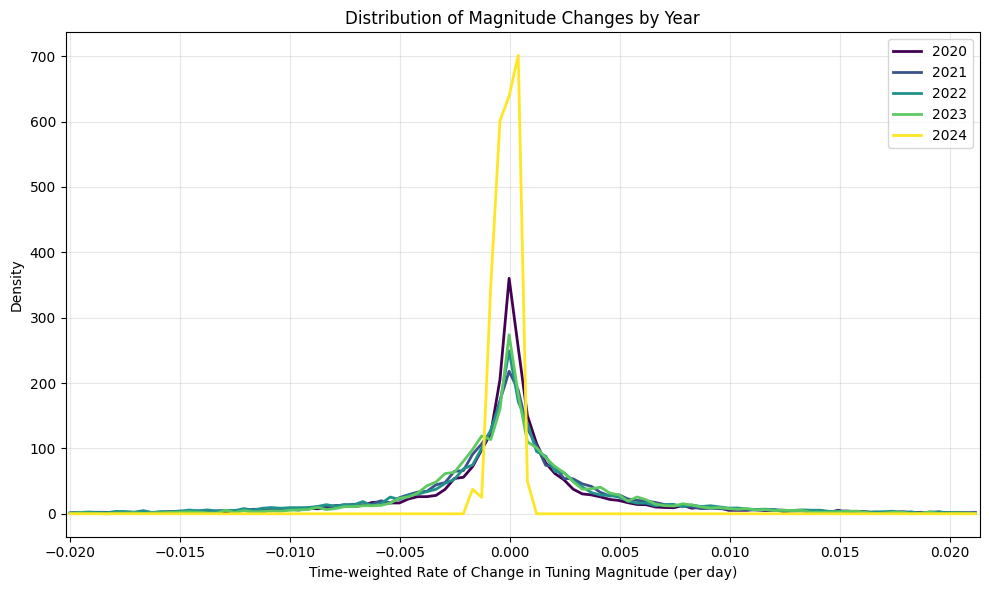


## Yearly Mean Rates of Change ##
Year 2020: 0.000093 per day
Year 2021: 0.000050 per day
Year 2022: -0.000033 per day
Year 2023: 0.000341 per day
Year 2024: -0.000179 per day

## Time-Weighted Rate Comparisons ##
Years        JS Div     t-stat     t p-val    Mean Diff 
------------------------------------------------------------
2020-2021    0.0927    0.4681    6.40e-01  -0.000043
2020-2022    0.0862    1.2539    2.10e-01  -0.000126
2020-2023    0.0950    -2.3334    1.96e-02  0.000248
2020-2024    0.4642    3.3250    8.93e-04  -0.000272
2021-2022    0.0484    0.9357    3.49e-01  -0.000083
2021-2023    0.0745    -3.0656    2.18e-03  0.000291
2021-2024    0.5309    3.4387    5.96e-04  -0.000228
2022-2023    0.0887    -3.6266    2.88e-04  0.000374
2022-2024    0.5251    1.8664    6.21e-02  -0.000145
2023-2024    0.5238    6.1433    9.05e-10  -0.000519


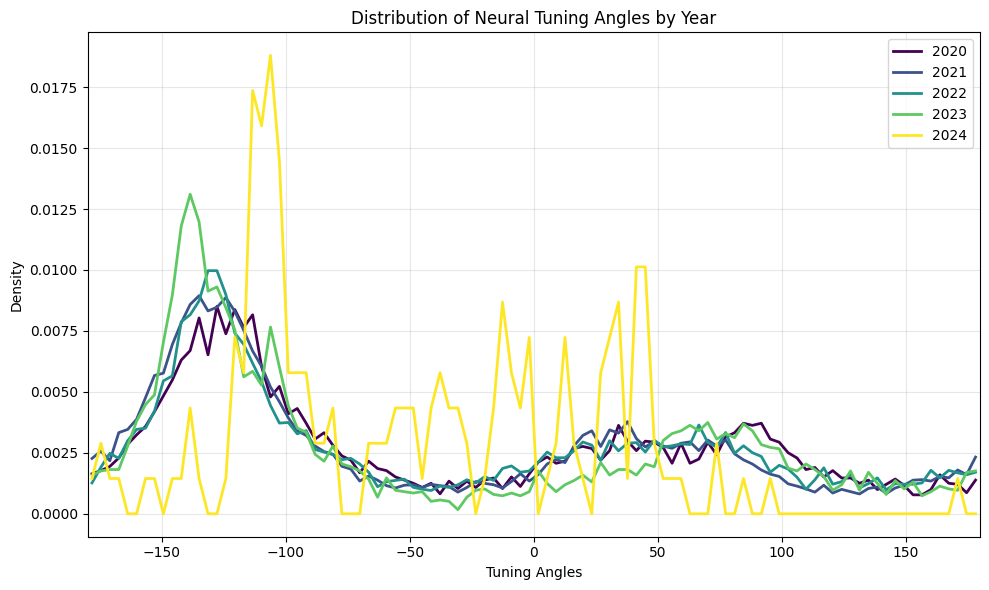


## Yearly Mean Angles ##
Year 2020: -37.22 degrees
Year 2021: -46.37 degrees
Year 2022: -39.59 degrees
Year 2023: -48.61 degrees
Year 2024: -49.65 degrees

## Angular Distribution Comparisons ##
Years        JS Div     t-stat     t p-val    Mean Diff 
------------------------------------------------------------
2020-2021    0.0962    6.0613    1.39e-09  -9.15
2020-2022    0.0810    1.4843    1.38e-01  -2.37
2020-2023    0.1318    5.8593    4.79e-09  -11.39
2020-2024    0.4469    2.4714    1.42e-02  -12.43
2021-2022    0.0655    -5.2472    1.56e-07  6.78
2021-2023    0.1282    1.3168    1.88e-01  -2.24
2021-2024    0.4510    0.6639    5.07e-01  -3.28
2022-2023    0.1222    5.0666    4.13e-07  -9.02
2022-2024    0.4587    2.0247    4.42e-02  -10.06
2023-2024    0.4981    0.2040    8.39e-01  -1.04


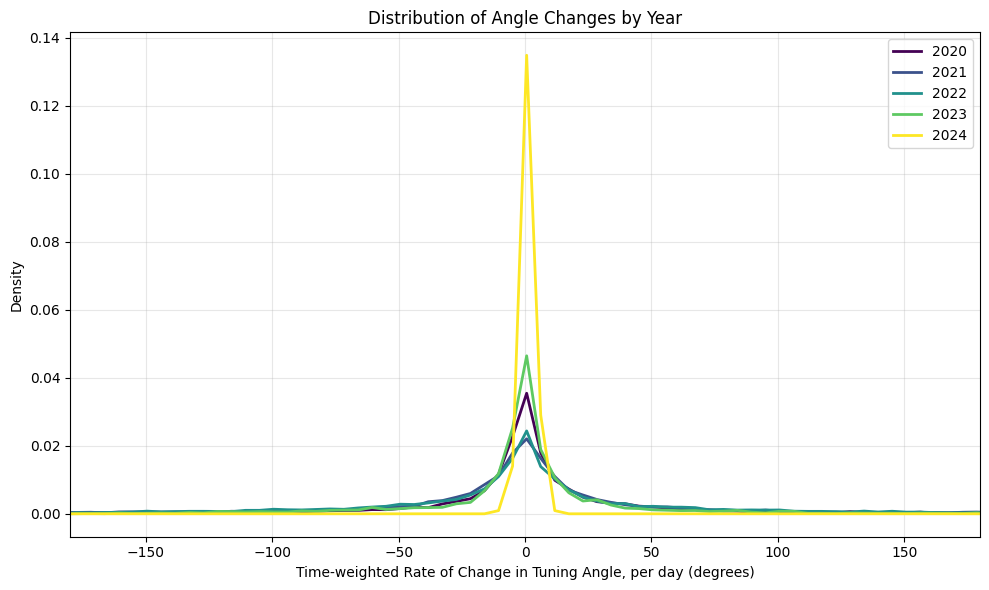


## Yearly Mean Rates of Change ##
Year 2020: -1.049580 per day
Year 2021: -0.283708 per day
Year 2022: 1.401457 per day
Year 2023: -0.780730 per day
Year 2024: 0.691757 per day

## Time-Weighted Rate Comparisons ##
Years        JS Div     t-stat     t p-val    Mean Diff 
------------------------------------------------------------
2020-2021    0.1156    -0.6716    5.02e-01  0.765872
2020-2022    0.1279    -2.1123    3.47e-02  2.451036
2020-2023    0.1056    -0.2184    8.27e-01  0.268850
2020-2024    0.5266    -1.9044    5.69e-02  1.741336
2021-2022    0.0686    -1.6363    1.02e-01  1.685164
2021-2023    0.1730    0.4483    6.54e-01  -0.497022
2021-2024    0.5953    -1.3151    1.88e-01  0.975464
2022-2023    0.1829    1.9324    5.33e-02  -2.182187
2022-2024    0.5935    0.9193    3.58e-01  -0.709700
2023-2024    0.4789    -1.6837    9.23e-02  1.472487
Mean of Mean Day-to-Day Changes:  36.26892405752034 Mean of Mean Month-to-Month Changes:  32.59484461267366


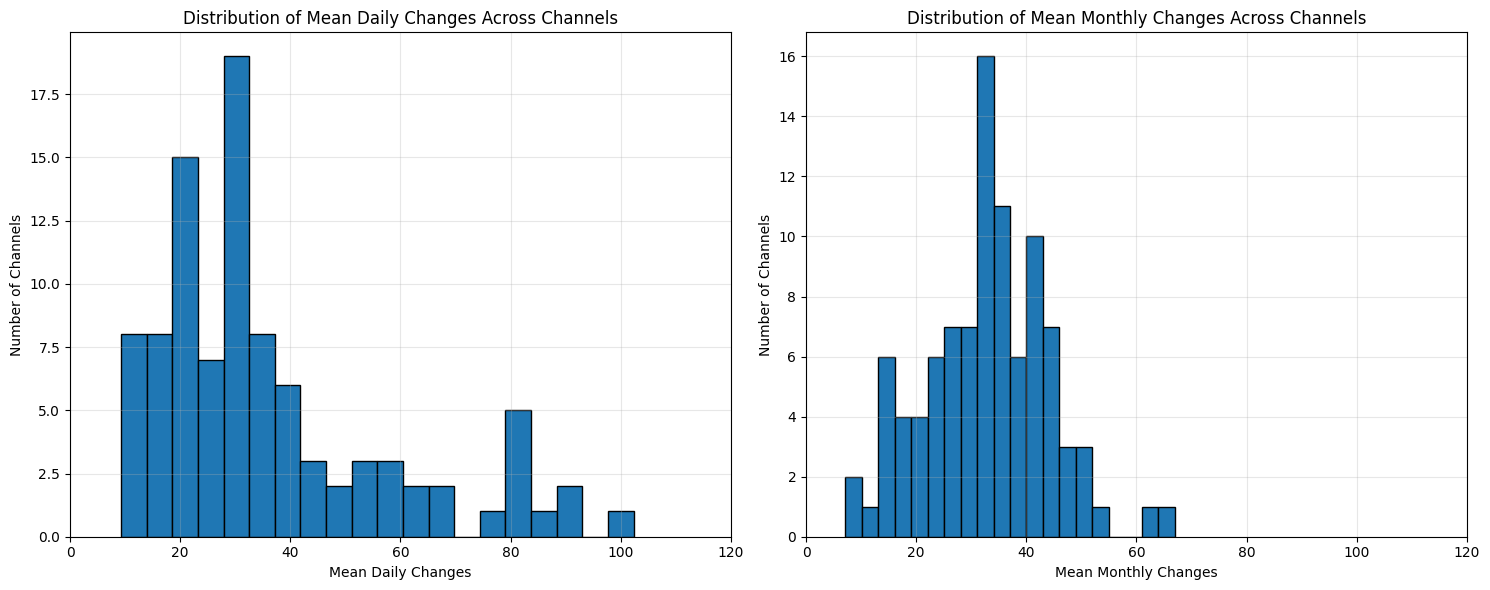


Daily Changes Summary:
Mean: 36.2689
Std: 21.5884
Min: 9.2561
Max: 102.3502

Monthly Changes Summary:
Mean: 32.5948
Std: 11.3029
Min: 7.1328
Max: 66.9539


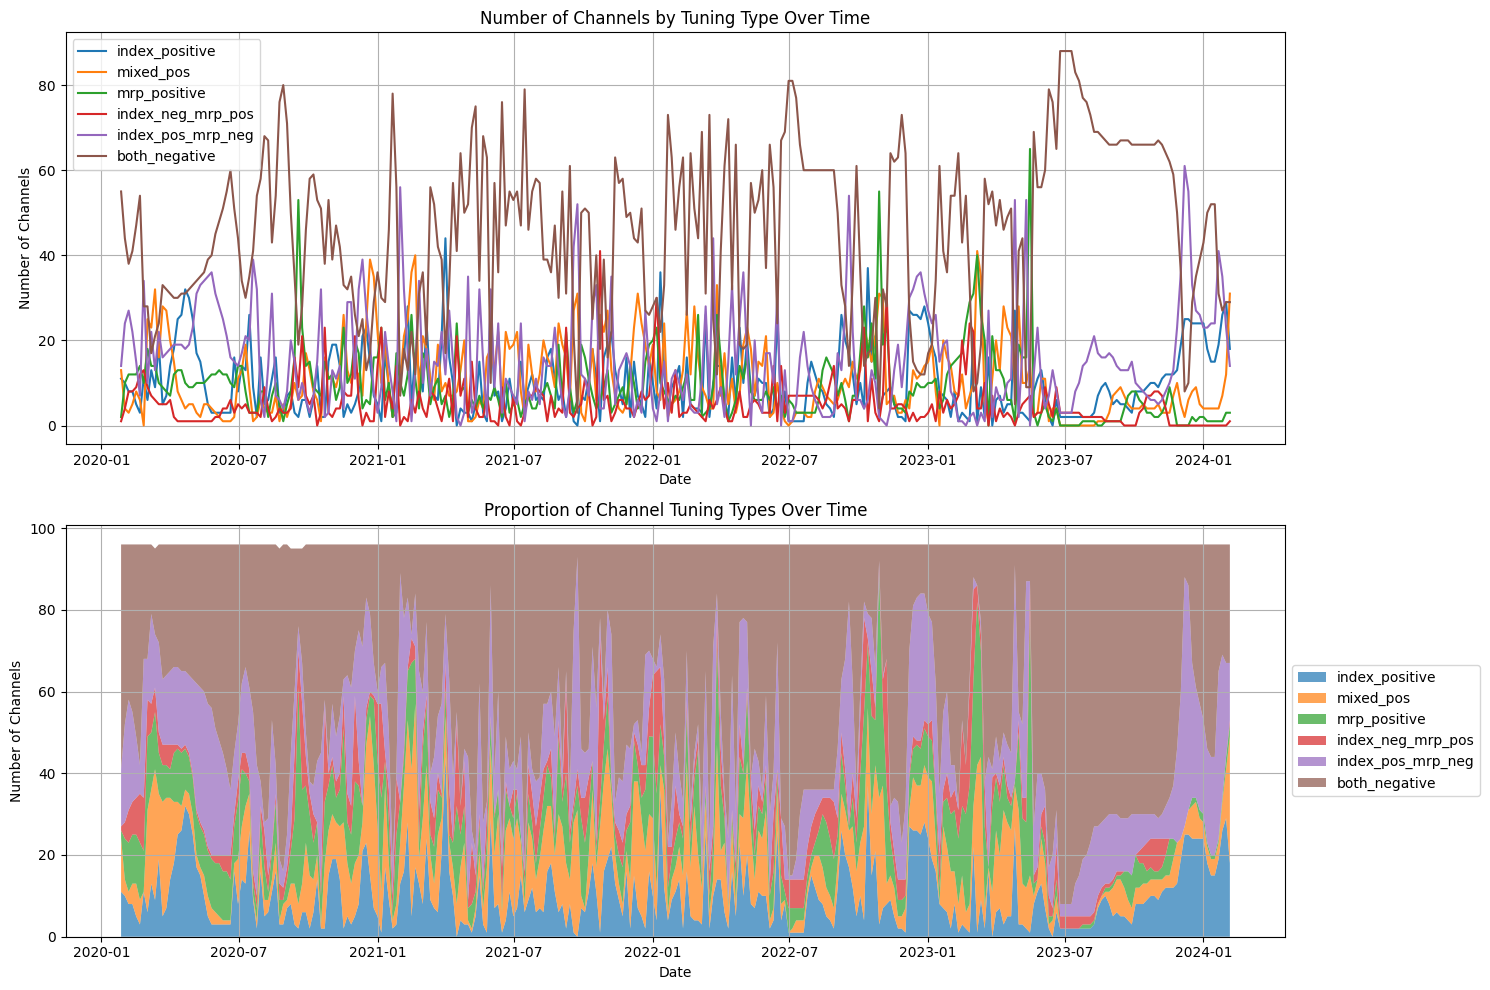


Average number of channels in each category:
index_positive: 10.1
mixed_pos: 10.6
mrp_positive: 9.1
index_neg_mrp_pos: 5.2
index_pos_mrp_neg: 15.2
both_negative: 45.6

Average Magnitudes:
Negative angles (-180° to -90°): 0.01
All other angles: 0.01


In [13]:
stabtune_plotter.stability_tuning_load(tuning_df)